
Input test_noise wave data:


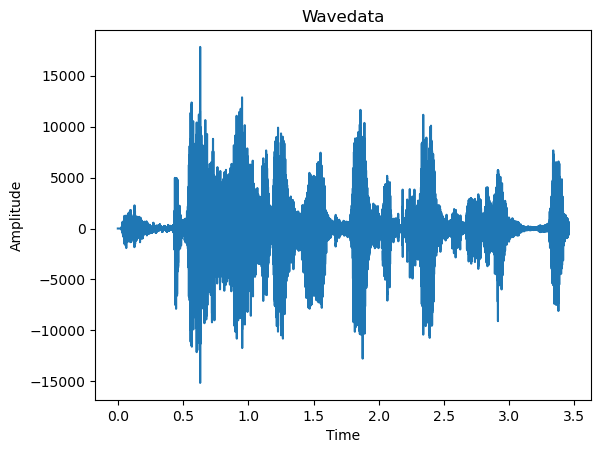

C:\Users\Shubhrika\AppData\Local\Temp\ipykernel_34224\2564094298.py:49: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  f.writeframes(save_wav.tostring())



Time domain(moving average) Filter wavedata:


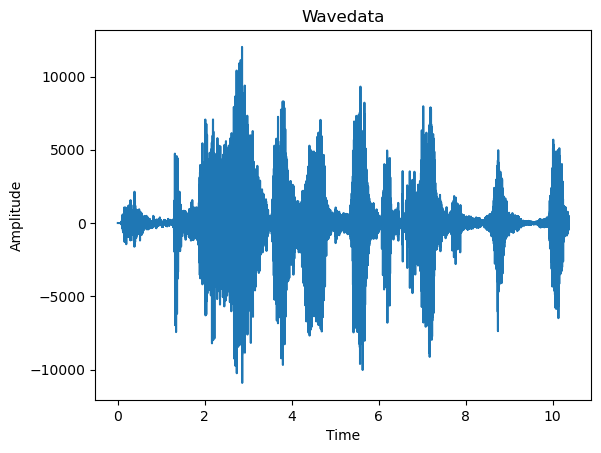

(array([   0,    0,    0, ..., -263, -230, -174], dtype=int16),
 array([0.00000000e+00, 6.25000000e-05, 1.25000000e-04, ...,
        1.03672500e+01, 1.03673125e+01, 1.03673750e+01]))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import wave as we


def read_wav(wavfile):
    f = wavfile
    params = f.getparams()

    nchannels, sampwidth, framerate, nframes = params[:4]
    strData = f.readframes(nframes)
    waveData = np.frombuffer(strData, dtype=np.int16)

    time = np.arange(0, nframes)*(1.0 / framerate)
    plt.plot(time, waveData)
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.title("Wavedata")
    plt.show()
    return (waveData, time)

print("\nInput test_noise wave data:")

f = we.open("Merged_Audio/Merged_audio_15.wav", 'rb')
data, time = read_wav(f)
length=data.shape[0]/16000


time = np.linspace(0., length, data.shape[0])


def moving_avg(audio_data,avg_length):
    new_data=[]
    for i in range(data.shape[0]-avg_length+1):
        new_data.append(np.average(data[i:i+avg_length]))
    new_data=np.array(new_data).reshape((-1,1))
    new_data=np.int32(new_data)
    return new_data    

for i in range(1,11):
    new_data=moving_avg(data,i)
    time = np.linspace(0., length, new_data.shape[0])
    save_wav = new_data.real.reshape((len(new_data), 1)).T.astype(np.short)
    f = we.open("moving_avg_fliter_15.wav", "wb")
    f.setnchannels(1)
    f.setsampwidth(2)
    f.setframerate(16000)
    f.writeframes(save_wav.tostring())
    f.close()

f = we.open("moving_avg_fliter_15.wav", 'rb')
print("\nTime domain(moving average) Filter wavedata:")
read_wav(f)